#### Wave `propagation`

We asked the question: given a field at plane $z=0$, how will we find the `propagated field` at some other $z$? We used `angular spectrum` approach

* Decompose field $U(x, y, 0)$ into 2d plane waves (Fourier transform of field)
* Propagrate each plane wave separately to $z$ (Add phase term in direction of propagation)
* Aggregate propagated plane waves together to find $U(x, y, z)$ (Inverse Fourier transform)

We see

$$\begin{align*}
U(x, y, z)&=F^{-1}\left.\left\{ \left.F \{U(x, y, 0)\}\right|_{f_x, f_y} \cdot \exp\left({2\pi if_zz}\right) \right\}\right|_{x, y}
\end{align*}$$

#### `Huygens'` principle

Another way of approaching this is to use Huygens' principle, treating each point of the field at $z=0$ as a point source emitting spherical waves

Recall spherical wave formula in context of Huygens' principle

$$U(\mathbf{r})=\frac{1}{\lambda i} \cos(\chi) \frac{e^{i k |\textbf{r}|}}{4\pi|\mathbf{r}|}$$

* `Wave number` $k=\frac{2\pi}{\lambda}$, and `phase velocity` $c=\frac{\omega}{k}$
* $\chi$ is the `angle` between the normal of the primary wavefront and the normal of the secondary wavefront
* $\cos(\chi)$ is generally used, meaning the secondary wave decays as its wavefront normal becomes less aligned with primary wavefront normal
* $\frac{1}{\lambda i}$ indicates the secondary wave is $\frac{\pi}{2}$ out of phase

Using $(x',y')$ for original plane at $z_0=0$, if $z$ is large compared to size of field at $z_0$ (near field to far field), we can simplify $U(\mathbf{r})$ for $(x, y)$ at $z$ as

$$\boxed{\frac{1}{\lambda i}U(x', y', 0)\cdot \frac{z}{r^2}e^{ikr}}$$

where $r$ points from $(x',y')$ to $(x, y)$ and has angle from horizontal optical axis $\chi$, where $\cos\chi$ can be approximated by $\frac{z}{r}$

$r$ can be calculated using

$$\boxed{r=\sqrt{(x-x')^2+(y-y')^2+z^2}}$$

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle
import numpy as np

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.html

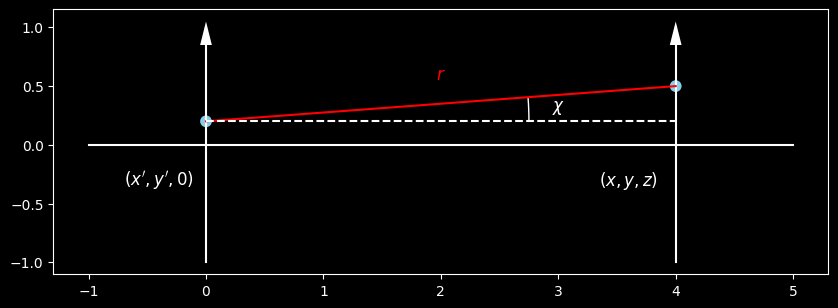

In [ ]:
fig_1, ax_1 = plt.subplots(figsize=(10, 4))

ax_1.plot([0, 0],[-1,1],'w')
ax_1.plot([4, 4],[-1,1],'w')
ax_1.plot([-1, 5],[0,0], 'w')

ax_1.text(-0.4, -0.3, r"$(x', y', 0)$", horizontalalignment='center', verticalalignment='center', fontsize=12, color='w')
ax_1.text(3.6, -0.3, r'$(x, y, z)$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='w')

ax_1.arrow(0, 1-0.15, 0, 0,  head_width=0.1, head_length=0.2, fc='w', ec='none')
ax_1.arrow(4, 1-0.15, 0, 0,  head_width=0.1, head_length=0.2, fc='w', ec='none')


xy_prine = Circle((0,0.2), 0.05, edgecolor='none', facecolor='skyblue', zorder=-6)
ax_1.add_patch(xy_prine)

xy = Circle((4,0.5), 0.05, edgecolor='none', facecolor='skyblue', zorder=-6)
ax_1.add_patch(xy)

ax_1.plot([0, 4],[0.2,0.5], 'r')
ax_1.plot([0, 4],[0.2,0.2], 'w--')

ax_1.text(2, 0.6, r'$r$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='r')

arc = Arc([0, 0.2], 5.5, 5.5, theta1=0, theta2=np.rad2deg(np.arctan2(0.3, 4)), color='w')
ax_1.add_patch(arc)
ax_1.text(3, 0.32, r'$\chi$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='w')

ax_1.set_aspect('equal')
plt.show()

#### `Rayleigh-Sommerfeld` integral

Using the above setup, we can write R-S integral of field at $z$

$$\boxed{U(x, y, z)=\frac{1}{\lambda i} \iint U(x', y', 0)\cdot \frac{z}{r^2}e^{ikr}dx'dy'}$$

When $z$ is large, we can simplify

$$\boxed{\frac{1}{r^2}\approx \frac{1}{z^2}}$$

This is valid as small perturbation (e.g., at the level of $\lambda$) to the actual $r$ won't matter

$$\frac{1}{\left(r+\frac{\lambda}{2}\right)^2}\approx \frac{1}{r^2} \approx \frac{1}{z^2}$$

However, we `cannot` simplify similarly $e^{ikr}$ as $e^{ikr}\approx e^{ikz}$, as small perturbation leads to `wrong sign`, regardless of $r$

$$e^{ik\left(r+\frac{\lambda}{2}\right)}=e^{ikr+i\pi}=-e^{ikr}$$

#### `Fresnel` and `Fraunhofer` approximation

 Rewrite $r=\sqrt{(x-x')^2+(y-y')^2+z^2}$ after we pull $z$ out of square root

$$r=z\sqrt{1+\frac{(x-x')^2+(y-y')^2}{z^2}}$$

Again, assuming $z\gg x, y$, we can approximate this using first two terms in Taylor expansion

$$\sqrt{1+a}\approx 1+\frac{a}{2}-\frac{a^2}{8}+ \cdots$$

and we get `Fresnel approxmation` for `near to intermediate field`

$$r\approx \boxed{z\left(1+\frac{(x-x')^2+(y-y')^2}{2z^2}\right)}$$

by ignoring the quadratic terms $x'^2$ and $y'^2$, we can get `Fraunhofer approximation` for `far field`

$$r\approx \boxed{z\left(1+\frac{x^2+y^2-2xx'-2yy'}{2z^2}\right)}$$

#### R-S integral under `Fresnel` approximation

$$\begin{align}
U(x, y, z)&=\frac{1}{\lambda i} \iint U(x', y', 0)\cdot \frac{z}{r^2}e^{ikr}dx'dy'\\
&\approx\frac{1}{\lambda i} \iint U(x', y', 0)\cdot \frac{1}{z}e^{ik\left(z+\frac{x^2+y^2}{2z}+\frac{x'^2+y'^2}{2z}+\frac{-xx'-yy'}{z}\right)}dx'dy'\\
&=\frac{1}{\lambda z i} e^{ik\left(z+\frac{x^2+y^2}{2z}\right)}\iint U(x', y', 0)\cdot e^{ik \frac{x'^2+y'^2}{2z} } e^{ik\left(\frac{-xx'-yy'}{z}\right)}dx'dy'\\
&=\frac{1}{\lambda z i} e^{ik\left(z+\frac{x^2+y^2}{2z}\right)}\iint U(x', y', 0)\cdot e^{ik\frac{x'^2+y'^2}{2z}} e^{-2\pi i\left(\frac{x}{\lambda z}x'+\frac{y}{\lambda z}y'\right)}dx'dy' \,\,\,(k=\frac{2\pi}{\lambda}) \\
&=\boxed{\frac{1}{\lambda z i} e^{ik\left(z+\frac{x^2+y^2}{2z}\right)} F\left.\left(U(x', y', 0)\cdot e^{ik \frac{x'^2+y'^2}{2z}}\right)\right|_{\frac{x}{\lambda z},\frac{y}{\lambda z}}} \\
\end{align}$$

In essence, for Fresnel approximation, we `multiply` original field with a `quadratic phase factor` from the source plane, then `Fourier transform` it to evaluate at target plane

#### R-S integral under `Fraunhofer` approximation

We drop the quadratic phase factor and get

$$\begin{align}
U(x, y, z)\approx\boxed{\frac{1}{\lambda z i} e^{ik\left(z+\frac{x^2+y^2}{2z}\right)} F\left.\left(U(x', y', 0)\right)\right|_{\frac{x}{\lambda z},\frac{y}{\lambda z}}} \\
\end{align}$$

This means far field pattern is the Fourier transform of the original field

#### `Short notation`

Let

$$Q_z(x, y)=e^{ik\frac{x^2+y^2}{2z}}$$

Then, we can write R-S under `Fresnel` as (ignore $\frac{1}{\lambda z i} e^{ikz})$

$$U(x, y, z)=\boxed{Q_z(x, y)\cdot F\left.\left(U(x', y', 0)\cdot Q_z(x', y')\right)\right|_{\frac{x}{\lambda z},\frac{y}{\lambda z}}}$$

and R-S under `Fraunhofer` as

$$U(x, y, z)=\boxed{Q_z(x, y)\cdot F\left.\left(U(x', y', 0)\right)\right|_{\frac{x}{\lambda z},\frac{y}{\lambda z}}}$$

In this form, distinguishing $x$ from $x'$ is not neceesary, as one is placed `outside` of Fourier transform, and one is `inside`, there should be no misunderstanding regarding which correspond to initial plane and which correspond to target plane

#### When is `Fresnel` approximation `valid`?

For clarity, we let $\rho=\sqrt{(x-x'^2)+(y-y'^2)}$, then $r$ becomes (using Taylor approximation)

$$\begin{align}
r&=z\sqrt{1+\frac{\rho^2}{z^2}}\\
&\approx z\left(1+\frac{1}{2}\frac{\rho^2}{z^2}-\frac{1}{8}\frac{\rho^4}{z^4}\right)
\end{align}
$$

Therefore, for `Fresnel` approximation, the error is in the order of

$$k \frac{1}{8}\frac{\rho^4}{z^3}=\frac{2\pi}{\lambda}\frac{1}{8}\frac{\rho^4}{z^3}$$

As this is in $e^{ikr}$, we want the error to be much smaller than $2\pi$

$$\frac{2\pi}{8\lambda}\frac{\rho^4}{z^3}\ll 2\pi$$

After rearranging...

$$\boxed{\frac{z}{\lambda}\gg \frac{1}{2}\left(\frac{\rho}{\lambda}\right)^{\frac{4}{3}}}$$

#### When is `Fraunhofer` approximation `valid`?

Assume original field is within circle of radius $R$ (e.g., could be the aperture size), as a result

$$x'^2+y'^2<R^2$$

We want the `quadratic phase term to be negligible`, or

$$k\frac{x'^2+y'^2}{2z}=\frac{2\pi}{\lambda}\cdot \frac{x'^2+y'^2}{2z} \ll 2\pi$$

We need

$$\frac{2\pi}{\lambda}\frac{R^2}{2z}\ll 2\pi$$

or

$$\boxed{z\gg \frac{R^2}{2\lambda}}$$

#### `Fresnel` number

We can define Fresnel number using $\frac{R^2}{\lambda z}$

If $\boxed{\frac{R^2}{\lambda z}\ll 1}$, we are in the `far field`, otherwise, we are in the `near to intermediate field`